## Book 5_Random Forest Classifier_TFDIF

*Note: I was unable to upload all of the datasets that I have used in these notebooks onto github because of how big the size of the file was. But if you have any questions feel free to reach out to me thank you :)*

This book will focus on the TF-IDF model and the random forest model.
    
    1.1: Preparing the data for training the model 
    1.2: Building a Random Forest model
    1.3: Evaluating the model on the test data
    

In [1]:
import pandas as pd
import numpy as np

# for modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

# for Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import graphviz 
# pip install grpahviz

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importing CV
X_tfidf_df = pd.read_csv('../data/X_tfidf_df.csv')

In [4]:
# Importing 
suicide_merged = pd.read_csv('../data/suicide_merged.csv')

In [5]:
di = {'suicide': 1, 'non-suicide' : 0}
suicide_merged['class'] = suicide_merged['class'].map(di)

In [6]:
suicide_merged.shape

(4000, 15)

In [7]:
suicide_merged['class'].value_counts()

0    2000
1    2000
Name: class, dtype: int64

In [8]:
# assigning X and y 
X = X_tfidf_df
y = suicide_merged['class']

### 1.1 Preparing the data for training the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

### 1.2 Building a Random Forest model

In [10]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [11]:
y_train_array = np.ravel(y_train)

In [12]:
classifier.fit(X_train, y_train_array)

RandomForestClassifier(n_estimators=200, random_state=0)

In [13]:
y_pred = classifier.predict(X_test)

### 1.3 Evaluating the model on the test data

In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       498
           1       0.93      0.99      0.96       502

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [15]:
# Current score without tuning
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# scores
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score = recall_score(y_test, y_pred)
specificity_score = tn / (tn + fp)

print('accuracy score: ' + str(accuracy_score))
print('precision score: ' + str(precision_score))
print('recall score: ' + str(recall_score))
print('specificity score: ' + str(specificity_score))

accuracy score: 0.958
precision score: 0.9275092936802974
recall score: 0.9940239043824701
specificity score: 0.9216867469879518


In [16]:
# Current score without tuning
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[459  39]
 [  3 499]] : is the confusion matrix
0.958 : is the accuracy score
0.9275092936802974 : is the precision score
0.9940239043824701 : is the recall score
0.9596153846153846 : is the f1 score


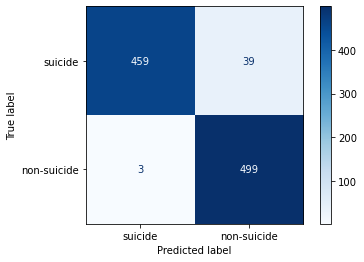

In [17]:
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['suicide', 'non-suicide']);

In [18]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 1 

In [19]:
print(y_pred)

[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 1 

In [20]:
# Save model